<a href="https://colab.research.google.com/github/SantiM01/Senior-Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('filtered_by_player_20245.csv')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check unique values for a supposed unique identifier
if 'player_id' in df.columns:
    print("Unique player IDs count:", df['player_id'].nunique())

# Get a quick statistical summary
print("Statistical summary of numerical features:")
print(df.describe())

# Check data types
print("Data types of each column:")
print(df.dtypes)


Missing values per column:
old_game_id            0
qb_id                  0
time_of_day            0
temp                   0
wind                   0
roof                   0
surface                0
qb_total_rush_plays    0
dtype: int64
Statistical summary of numerical features:
        old_game_id    qb_id       temp       wind       roof    surface  \
count  8.600000e+01     86.0  86.000000  86.000000  86.000000  86.000000   
mean   2.010579e+09  20245.0  61.883721   6.918605   0.244186   0.372093   
std    2.734512e+06      0.0  13.664397   5.756255   0.432123   0.486198   
min    2.006091e+09  20245.0  30.000000   0.000000   0.000000   0.000000   
25%    2.009111e+09  20245.0  54.500000   0.000000   0.000000   0.000000   
50%    2.011091e+09  20245.0  65.000000   6.000000   0.000000   0.000000   
75%    2.012120e+09  20245.0  70.000000  10.750000   0.000000   1.000000   
max    2.015102e+09  20245.0  93.000000  20.000000   1.000000   1.000000   

       qb_total_rush_plays  
cou

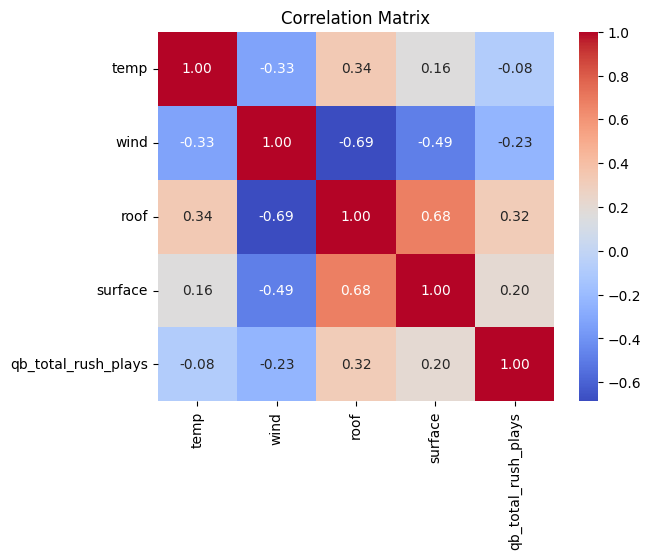

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('filtered_by_player_20245.csv')

# Calculate correlation matrix
corr = data[['temp', 'wind', 'roof', 'surface', 'qb_total_rush_plays']].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'data' is your DataFrame
X = data[['temp', 'wind', 'roof', 'surface']]
y = data['qb_total_rush_plays']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Test RMSE:", rmse)


Test RMSE: 31.29612173741542


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv("filtered_by_player_20245.csv")

# Define features and target variable
features = ['temp', 'wind', 'roof', 'surface']
target = 'qb_total_rush_plays'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Since there's no 'player_name', focus on the maximum rush attempt prediction
df_test = df.iloc[y_test.index].copy()
df_test['predicted_rush_attempts'] = y_pred
max_rush_attempt = df_test['predicted_rush_attempts'].max()
print(f"Maximum predicted rush attempts: {max_rush_attempt}")


Mean Absolute Error: 29.43724801805284
Maximum predicted rush attempts: 104.86854553222656


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv("filtered_by_player_20245.csv")

# Define features and target variable
features = ['temp', 'wind', 'roof', 'surface']
target = 'qb_total_rush_plays'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Assuming you need to estimate conditions for next season's games
average_temp = df['temp'].mean()
average_wind = df['wind'].mean()
most_common_roof = int(df['roof'].mode()[0])
most_common_surface = int(df['surface'].mode()[0])

# Create a DataFrame for next season's predicted games based on historical averages
next_season_features = pd.DataFrame({
    'temp': [average_temp],
    'wind': [average_wind],
    'roof': [most_common_roof],
    'surface': [most_common_surface]
})

# Predict next season's total rush attempts using the model
next_season_prediction = model.predict(next_season_features)
print("Predicted total rush attempts for next season:", next_season_prediction[0])



Mean Absolute Error: 29.43724801805284
Predicted total rush attempts for next season: 42.99487
